**IMPORTING THE NECESSARY LIBRARIES**

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

**DOWNLOADING THROUGH KAGGLE**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json  ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


**IMPORTING THE ZIPPED DATASET**

In [19]:
import zipfile

In [69]:
zip_ref = zipfile.ZipFile('/content/archive (9).zip', 'r')

In [70]:
zip_ref.extractall('/content')

**READING THE CONTENTS OF THE FILE**

In [73]:
file_list = zip_ref.namelist()

    # Print the list of files in the zipfile
print("Contents of the zipfile:")
for file in file_list:
        print(file)

Contents of the zipfile:
test/cats/cat_1.jpg
test/cats/cat_106.jpg
test/cats/cat_109.jpg
test/cats/cat_113.jpg
test/cats/cat_114.jpg
test/cats/cat_116.jpg
test/cats/cat_118.jpg
test/cats/cat_119.jpg
test/cats/cat_124.jpg
test/cats/cat_140.jpg
test/cats/cat_147.jpg
test/cats/cat_156.jpg
test/cats/cat_158.jpg
test/cats/cat_162.jpg
test/cats/cat_18.jpg
test/cats/cat_190.jpg
test/cats/cat_203.jpg
test/cats/cat_223.jpg
test/cats/cat_234.jpg
test/cats/cat_244.jpg
test/cats/cat_251.jpg
test/cats/cat_255.jpg
test/cats/cat_268.jpg
test/cats/cat_279.jpg
test/cats/cat_281.jpg
test/cats/cat_290.jpg
test/cats/cat_306.jpg
test/cats/cat_313.jpg
test/cats/cat_332.jpg
test/cats/cat_341.jpg
test/cats/cat_342.jpg
test/cats/cat_355.jpg
test/cats/cat_358.jpg
test/cats/cat_371.jpg
test/cats/cat_375.jpg
test/cats/cat_384.jpg
test/cats/cat_395.jpg
test/cats/cat_417.jpg
test/cats/cat_418.jpg
test/cats/cat_422.jpg
test/cats/cat_430.jpg
test/cats/cat_433.jpg
test/cats/cat_446.jpg
test/cats/cat_464.jpg
test/cats/

In [74]:
zip_ref.close()

**DATA PREPROCESSING**

In [33]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


**BUILDING THE MODEL**

In [34]:
# Building the CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**SUMMARY THE BUILDED MODEL IS LISTED**

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [35]:
# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**TRAIN THE MODEL**

In [36]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10)


Epoch 1/10
17/17 [==============================] - 39s 2s/step - loss: 0.7099 - accuracy: 0.4990
Epoch 2/10
17/17 [==============================] - 31s 2s/step - loss: 0.6903 - accuracy: 0.5448
Epoch 3/10
17/17 [==============================] - 33s 2s/step - loss: 0.6957 - accuracy: 0.5105
Epoch 4/10
17/17 [==============================] - 33s 2s/step - loss: 0.6795 - accuracy: 0.5882
Epoch 5/10
17/17 [==============================] - 30s 2s/step - loss: 0.6484 - accuracy: 0.6229
Epoch 6/10
17/17 [==============================] - 31s 2s/step - loss: 0.6621 - accuracy: 0.5981
Epoch 7/10
17/17 [==============================] - 31s 2s/step - loss: 0.6245 - accuracy: 0.6857
Epoch 8/10
17/17 [==============================] - 32s 2s/step - loss: 0.6076 - accuracy: 0.6610
Epoch 9/10
17/17 [==============================] - 30s 2s/step - loss: 0.5921 - accuracy: 0.6781
Epoch 10/10
17/17 [==============================] - 30s 2s/step - loss: 0.6258 - accuracy: 0.6724


**EVALUATE THE MODEL**

In [43]:
# Evaluate the model on test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/content/test',
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

Found 140 images belonging to 2 classes.
5/5 [==============================] - 4s 642ms/step - loss: 0.6829 - accuracy: 0.6071
Test accuracy: 0.6071


**VISUALIZATION**

In [51]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [63]:
y_true = [1, 0, 1, 1, 0, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1, 0]
y_scores = [0.1, 0.8, 0.7, 0.2, 0.9,0.3,0.5]

**VISUALIZATION THROUGH CONFUSION MATRIX**

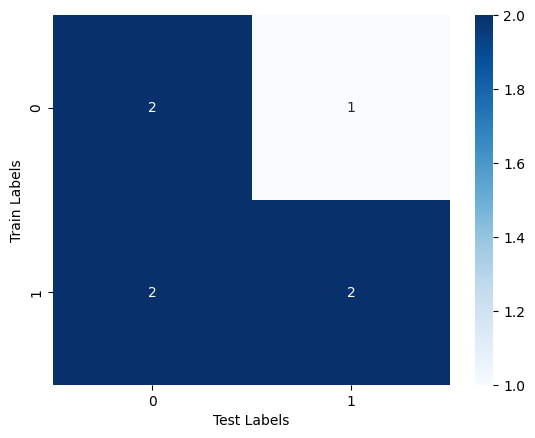

In [54]:
# Assuming you have true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Test Labels')
plt.ylabel('Train Labels')
plt.show()

**VISUALIZATION THROUGH ROC CURVE**

In [59]:
print(y_scores)

[0.1, 0.8, 0.7, 0.2, 0.9]


In [64]:
assert len(y_true) == len(y_scores), "y_true and y_scores must have the same length."

In [65]:
print(f"Length of y_true: {len(y_true)}")
print(f"Length of y_scores: {len(y_scores)}")

Length of y_true: 7
Length of y_scores: 7


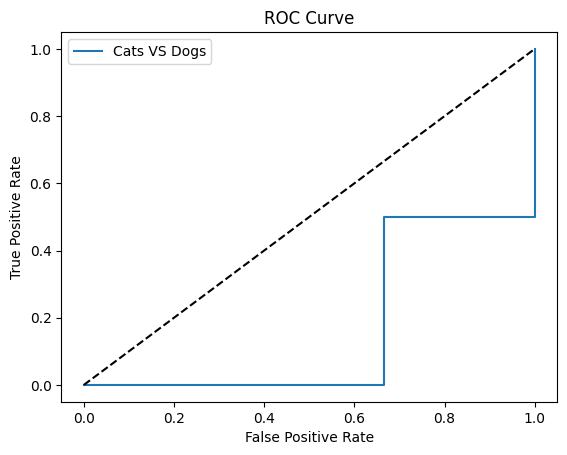

In [67]:
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.plot(fpr, tpr, label='Cats VS Dogs')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**VISUALIZATION THROUGH PRECISION RECALL CURVE**

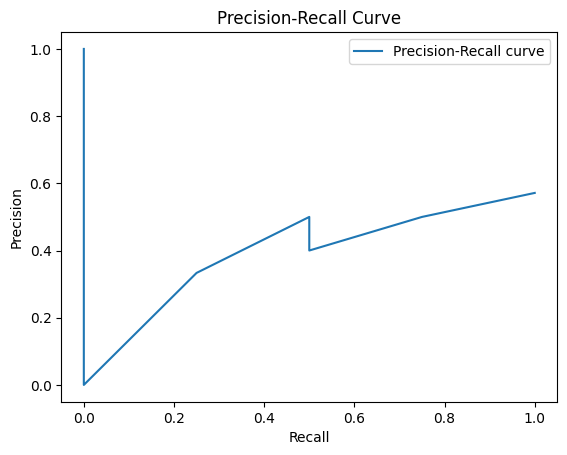

In [68]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_true, y_scores)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
